- -e . we used to import pakeges in Insurance pakeges 
were  there are written __init__.py there will try yo install the pakages


what is pakage ?

 Exception will going to become pakage and also  logger,pipeline etc

-- Now i have created structure in Petrol_price pakage 

-- component,config,entity,excption,logger,pipeline

Now as like root-level i am going to work on logger and excption

- Exception= to handle exceptional error or unexcepted thing

- Logger= To get all the logging or Status or what are running in project

"""
- In logger i wanted all the logs in a separeate floder for that i am creating direactory(dir) and floder name as "logs"  

"""

"""
- In excption i writing own  exception class
- (_,_,exec_tb) is  to get line number and file name and "_,_" means value and something which i dont want so thats why i wrote it as underscore _,_,ecxe_tb
-  I used sys module to know which line number cause error or which file name is causing error,excuction info
- And aslo i used @staticmethod to display the sys module
- i used staticmethod because i can call function "get_detailed_error_message" whithout calling classname or object of classname

what is object?

It is an  instance of a class


In [3]:

class Demo():
    def __init__(self,param1) -> None:
        self.param1=param1
    def __str__(self) -> str:
        return "return the error message"
    
    def __repr__(self) -> str:
        return "Demo()"

In [4]:
d=Demo()

TypeError: __init__() missing 1 required positional argument: 'param1'

In [ ]:
d ## recreating same object 

Demo()

In [ ]:
print(d)  ## string will return the error message 

return the error message


Creating pipeline OR life cycle of ml project or ML-ops pipeline


- Data_Ingestion= -- Bringing data into system,And split Data to Train spit,validation split and  Test split that i will not use test data split before validation 

-- 
-- I will create realstic scenario for my modeltesting.Because when we will deploy our model in real world it does not have any info about dataset that we used in prediction


- Data_validation=checking data , schema validation,Null check,duplicate data,outliers,imbalanced dataset,Domain Value,DataRnge,Data Drift:
"When your datset statastics gets change we call it as data drift"

- Do_EDA ,Do_Modelselection,= After data validation do eda Here i used jupyter notebook for EDA  and featuring engineering and do culsterning because it is handsonfree and by using pickle i will serialization(means saving the file using its object) and deserialization(means loading object or calling saved file ) and Transform function


- Data_Tranformation= Geting good data and bad data  OR  (Transform function) dataset here and transform that data to model Traninng 

- Model_Traning=Model selection,hyperparamete tuning etc,AND by pickle i will serialization(means saving the file using its object) and deserialization(means loading object or calling saved file ) and  Predict function

- Model_evalution=Geting bestmodel,use Test dataset for model evalution 

- Model_pusher= Modelcomparision (means compare with the best model and minimum excpection ) or also know as Model performance

- what is devops?

-- DevOps is a set of practices that aims to shorten a system's development life cycle and provide continuous delivery with high software quality

-- Maintaining Version of our Code.

-- git is going to take care of codeversioning.

-- Integrating changes in our code (means every devolper can check the code CI/ ).

-- And how frequntly deploy our code directly so that it can accessable to user (/CD).

- Mlops?

-- If we know Data-Versioning And Continous Trainig(CT)

-- Continous Trainig(CT) means (getting know is data as been Modified)

-- Dataversioning (means Creating version of data)

-- Regenerating New Model

-- IF data is getting change during data_ingestion i.e called dataversioing (means after 1 month data will get add more)

-- We will keep on Checking new data with EDA or Featureengeneering in notebook and Transform to data transformation or model Trainig

-- the process of taking machine learning models to production, and then maintaining and monitoring them. 


- NOW Creating Entity and Confiq 

- Artifact (means something observed in a scientific investigation or experiment that is not naturally present but occurs as a result of the preparative or investigative procedure.) ?

-- The result Or something get generated by pipeline is know as Artifact

-- In Entity we define artifact  for each component of pipeline (like data_ingestion_artifact ,data_validation_artifact ETC.)

- For Conifquration

-- To perform some task we need input so that is called configuration 

-- In confiq getting data for input for data_ingestion ,data_validation ETC.

-- data_ingestion_configuration,data_validation_configuration ETC.



- What is Named Tuple ?

-- Giving name to every element

--- name tuple is inmutable (means we get change the value)

1. Download url
2. Download folder (compressed file)
3. Extract folder (extracted file))
4. Train dataset folder
5. Test dataset folder

ETC

- WHAT IS YAML?

--YAML is a data serialization language that is often used for writing configuration files. 

- Now i created config.yaml file outside the petrol_price to give object for all the pipeline

- 1ST give structure for the pipeline in entity folder as config_entity

- 2nd GIve information for the structured pipeline(config_entity) in  oustide of petrol_price config.yaml file
 
-  3RD i will create configuration.py in inside of petrol_price (config folder) Here i will read Both (config_entity AND Config.yaml)

- Created constant file for any hardedcoded value OR variable OR onject :::Creating key for every config.yaml structure 


In [ ]:
import yaml,os

In [ ]:
os.getcwd()

'c:\\Users\\Hemanth\\Desktop\\Git hub\\Petrol_price_prediciton\\Petrol_price_prediction\\Notes'

In [ ]:
os.chdir("c:\\Users\\Hemanth\\Desktop\\Git hub\\Petrol_price_prediciton\\Petrol_price_prediction")

In [ ]:
os.getcwd("config")

TypeError: getcwd() takes no arguments (1 given)

In [ ]:
os.listdir(".")

['.dockerignore',
 '.git',
 '.github',
 '.gitignore',
 'app.py',
 'config',
 'demo.py',
 'Dockerfile',
 'LICENSE',
 'Notes',
 'Petrol_price',
 'Petrol_price_prediction.egg-info',
 'README.md',
 'requirements.txt',
 'setup.py',
 'venv',
 '__pycache__']

In [ ]:
config_file_path=os.path.join("config","config.yaml")

In [ ]:
config_file_path

'config\\config.yaml'

In [ ]:
config_info=None
with open(config_file_path,"rb") as yaml_file:
    config_info=yaml.safe_load(yaml_file)

In [ ]:
config_info["data_ingestion_config"]


{'dataset_download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',
 'raw_data_dir': 'raw_data',
 'tgz_download_dir': 'tgz_data',
 'ingested_dir': 'ingested_data',
 'ingested_train_dir': 'train',
 'ingested_test_dir': 'test'}

In [ ]:
def read_yaml_file(file_path:str)->dict:
    """
    Reads a YAML file and returns the contents as a dictionary.
    file_path: str
    """
    try:
        with open(file_path, 'rb') as yaml_file:
            return yaml.safe_load(yaml_file)
    except Exception as e:
        raise e

In [ ]:
config=read_yaml_file(config_file_path)

In [ ]:
config

{'training_pipeline_config': {'pipeline_name': 'Petrol_price',
  'artifact_dir': 'artifact'},
 'data_ingestion_config': {'dataset_download_url': 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz',
  'raw_data_dir': 'raw_data',
  'tgz_download_dir': 'tgz_data',
  'ingested_dir': 'ingested_data',
  'ingested_train_dir': 'train',
  'ingested_test_dir': 'test'},
 'data_validation_config': {'schema_dir': 'config',
  'schema_file_name': 'schema.yaml',
  'report_file_name': 'report.json',
  'report_page_file_name': 'report.html'},
 'data_transformation_config': {'transformed_dir': 'transformed_data',
  'transformed_train_dir': 'train',
  'transformed_test_dir': 'test',
  'preprocessing_dir': 'preprocessed',
  'preprocessed_object_file_name': 'preprocessed.pkl'},
 'model_trainer_config': {'trained_model_dir': 'trained_model',
  'model_file_name': 'model.pkl',
  'base_accuracy': 0.6,
  'model_config_dir': 'config',
  'model_config_file_name': 'model.yaml'}

In [ ]:
from Petrol_price.constant import *
config[TRAINING_PIPELINE_CONFIG_KEY]

{'pipeline_name': 'Petrol_price', 'artifact_dir': 'artifact'}

In [ ]:
TRAINING_PIPELINE_CONFIG_KEY

'training_pipeline_config'

In [ ]:
ROOT_DIR

'c:\\Users\\Hemanth\\Desktop\\Git hub\\Petrol_price_prediciton\\Petrol_price_prediction'

In [ ]:
training_pipeline_config = config[TRAINING_PIPELINE_CONFIG_KEY]
artifact_dir = os.path.join(ROOT_DIR,
training_pipeline_config[TRAINING_PIPELINE_NAME_KEY],
training_pipeline_config[TRAINING_PIPELINE_ARTIFACT_DIR_KEY])

In [ ]:
training_pipeline_config

{'pipeline_name': 'Petrol_price', 'artifact_dir': 'artifact'}

In [ ]:
artifact_dir
from Petrol_price.config.configuration import Configuration

In [ ]:
config=Configuration()

In [ ]:
config.get_training_pipeline_config()

TrainingPipelineConfig(artifact_dir='c:\\Users\\Hemanth\\Desktop\\Git hub\\Petrol_price_prediciton\\Petrol_price_prediction\\Petrol_price\\artifact')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
insurance_data_frame=pd.read_csv(r"C:\Users\Hemanth\Desktop\Git hub\Insurance_premium_predicition\Insurance_Premium_Predicition\Insurance\artifact\data_ingestion\2022-08-05-12-24-55\raw_data\insurance.csv")

In [ ]:
insurance_data_frame.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<AxesSubplot:ylabel='Frequency'>

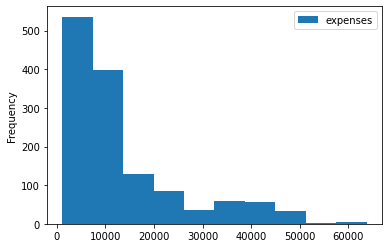

In [ ]:
insurance_data_frame[["expenses"]].plot(kind="hist")

In [ ]:
insurance_data_frame["expense_cat"] = pd.cut(
                insurance_data_frame["expenses"],
                bins=[1000, 10000, 20000, 30000, 40000, np.inf],
                labels=[1,2,3,4,5]
            )

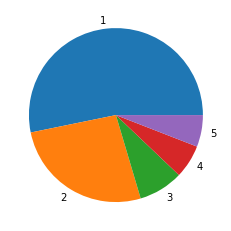

In [ ]:
plt.pie(insurance_data_frame.expense_cat.value_counts(),labels=insurance_data_frame.expense_cat.value_counts().index)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
for train_ix,test_ix in split.split(insurance_data_frame,insurance_data_frame["expense_cat"]):
    print(train_ix,test_ix)

[ 659   85  696 ... 1161   19  957] [ 656  706 1334 1267  884  199  994  420 1086  417 1137  114  307  939
  864 1116  764 1321   95 1250  421  625  674  144 1105  310 1240 1174
  951  367  616 1002  945  710  197  775  956 1315  580  140  392   91
  171  649  306  916  919 1202  370  915  494  599  848  194  302  336
 1029  596  470  733  756 1025   28  549 1032   78  107   51  859  164
  903  943  236 1194   86  759  189  397  772  371  948 1056  748 1096
  627  856  222  239  715 1256  268 1299  440  525 1216 1332  930  332
  413  737  847  800 1067  740 1054  398  364  702  416  517  299  865
  913  949 1052 1328 1149 1320  334  585  459  729  937  133 1132  369
 1144  983  464  886  594  726  652  206 1246  513 1245  248  879  887
 1058   41  399  381 1046 1177   29  483  208  521 1136 1318  469 1295
  143 1160  465   58  882  628  126  360  266   23  765  947 1085  120
  308  785 1179    2  944  185  558 1135  262  393  843  646  179 1306
  850  841   68 1288 1013  750  455   53 

In [ ]:
train_df=insurance_data_frame.loc[train_ix]

In [ ]:
train_df

,age,sex,bmi,children,smoker,region,expenses,expense_cat
659,57,female,28.8,4,no,northeast,14394.40,2
85,45,male,22.9,2,yes,northwest,21098.55,3
696,53,female,32.3,2,no,northeast,29186.48,3
912,59,female,26.7,3,no,northwest,14382.71,2
1326,42,female,32.9,0,no,northeast,7050.02,1
...,...,...,...,...,...,...,...,...
1221,40,male,25.0,2,no,southeast,6593.51,1
121,18,male,23.8,0,no,northeast,1705.62,1
1161,34,male,42.1,2,no,southeast,5124.19,1
19,30,male,35.3,0,yes,southwest,36837.47,4


In [ ]:
train_df.shape

(1070, 8)

In [ ]:
insurance_data_frame.shape

(1338, 8)

In [ ]:
test_df=insurance_data_frame.loc[test_ix]

In [ ]:
test_df.shape

(268, 8)

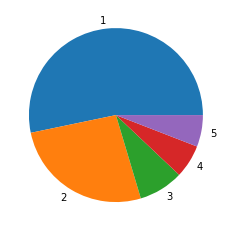

In [ ]:
plt.pie(train_df.expense_cat.value_counts(),labels=train_df.expense_cat.value_counts().index)
plt.show()

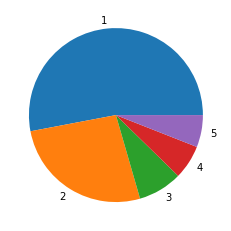

In [ ]:
plt.pie(test_df.expense_cat.value_counts(),labels=test_df.expense_cat.value_counts().index)
plt.show()

- i did StratifiedShuffleSplit so that train and test data have same amount of dataset 

- Next Datavalidation 
- for Datavalidatio we need a schema file 

In [ ]:

insurance_data_frame.dtypes.index,insurance_data_frame.dtypes.values

(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
        'expense_cat'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'),
        dtype('O'), dtype('O'), dtype('float64'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [ ]:
datatypes=list(map(lambda x:str(x).replace("dtypes('","").replace("')",""),insurance_data_frame.dtypes.values))

In [ ]:
column=insurance_data_frame.columns

In [ ]:
column

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
       'expense_cat'],
      dtype='object')

In [ ]:
dict(zip(column,datatypes))

{'age': 'int64',
 'sex': 'object',
 'bmi': 'float64',
 'children': 'int64',
 'smoker': 'object',
 'region': 'object',
 'expenses': 'float64',
 'expense_cat': 'category'}

- 1st i will give info to Config.yaml file
- 2nd i will difine  info to constant.py file
- 3rd i will use Constant in the configuration.py file
And i will give structure throught Enitity file
- 4th Then we will get configuration.py in component(pipeline)
- 5th Finally i will run the component through through Pipeline.py file

Flow
1. Initialize current timestamp in constant

2. Then start with logger (to track) and Exception( To Handle if unexpected thing happen)

3. Define the structure in config_enity.py

- Framing the requirements for the configuration

4. Create config.yaml and util.py
- yaml file is more readable compared to json file. util file is similar to helper function. It is a not a part of pipeline but may       required in pipeline files. It is like how to load pickle object, yaml file

5. constant.py
- Like initialize the filenames and foldernames

6. configuration.py
- Will create informations to create folders

7. artifact_enitity.py
- the output file paths

8. data_ingestion.py
- download data and split it into train and test data

9. pipeline.py
10. demo.py
- run demo.py to test

11. for data Validation
-  Create schema.yaml
- column names with datatype

12. constant.py
-  data validation related variables
- define keys after config.yaml file

13. configuration.py
- Evidently AI package is used for datadrift. Run statistical tests to compare the input feature distributions and usually explore the drift. Data Drift: When your datset stats gets change we call it as data drift

- Entity and write code in data_validation component and then in pipeline
- For data transformation
- repeat process

- yaml -> constants -> entity -> configuration -> component file -> pipeline

In [ ]:
dict1={"A":[4,3,2],"B":(2,3,4),"C":["ABC0","KJHG"]}

In [ ]:
dict1["C"][0]

'ABC0'

## Fit ,Fit_transform ,transform
- What is Fit,fit_tarnsform,transform ?
- Fit is like training our data Or analyses the data and store it
- Transforms is used for testing dataset after model is trained and stored through pickle object(seriliazation) with that object we pridict so we use transforms(testing dataset)
- fit_transformation 

- The fit() function calculates the values of these parameters. 
- The transform function applies the values of the parameters on the actual data and gives the normalized value. 
- The fit_transform() function performs both in the same step. Note that the same value is got whether we perform in 2 steps or in a single step.

## EDA

In [6]:
import pandas as pd
train_file_path=pd.read_csv(r"C:\Users\Hemanth\Desktop\Git hub\Insurance_premium_predicition\Insurance_Premium_Predicition\Insurance\artifact\data_ingestion\2022-08-07-21-04-04\raw_data\insurance.csv")

In [7]:
df=train_file_path

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
x,y=df.drop(columns=["expenses"],axis=1),df["expenses"]

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [ ]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [ ]:
x.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

## Categorical values

In [ ]:
for i in df.columns:
    if df[i].nunique() <5:
        print(f'{i} = {df[i].unique()} ')

sex = ['female' 'male'] 
smoker = ['yes' 'no'] 
region = ['southwest' 'southeast' 'northwest' 'northeast'] 


In [ ]:
for i in df.columns:
        if df[i].nunique() <5:
            print(f'{df[i].value_counts()}')
            print('------------------------------')

male      676
female    662
Name: sex, dtype: int64
------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
------------------------------


In [ ]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
## Numirical values
numerical_column=df.drop(["sex","smoker","region","expenses"],axis=1)

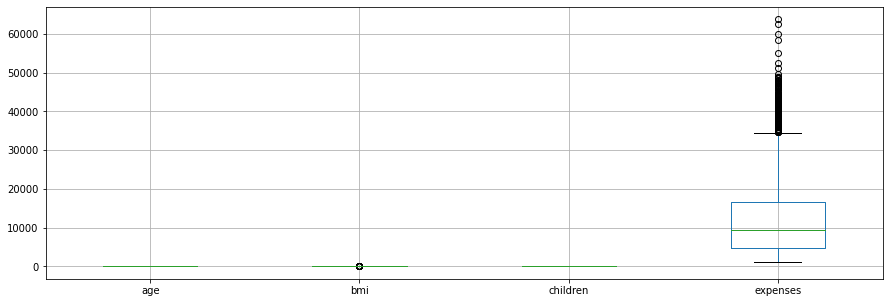

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15, 5))
 

# Creating plot
bp = df.boxplot()
 
# show plot
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
simple_imputer=SimpleImputer(strategy="median")

In [ ]:
simple_imputer.fit_transform(numerical_column)

array([[19. , 27.9,  0. ],
       [18. , 33.8,  1. ],
       [28. , 33. ,  3. ],
       ...,
       [18. , 36.9,  0. ],
       [21. , 25.8,  0. ],
       [61. , 29.1,  0. ]])

In [ ]:
simple_imputer.transform(numerical_column)

array([[19. , 27.9,  0. ],
       [18. , 33.8,  1. ],
       [28. , 33. ,  3. ],
       ...,
       [18. , 36.9,  0. ],
       [21. , 25.8,  0. ],
       [61. , 29.1,  0. ]])

In [ ]:
simple_imputer.feature_names_in_

array(['age', 'bmi', 'children'], dtype=object)

In [ ]:
simple_imputer.statistics_

array([39. , 30.4,  1. ])

In [ ]:
x.age.median()

39.0

In [ ]:
df.bmi.median()

30.4

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


c:\Users\Hemanth\Desktop\Git hub\Petrol_price_prediciton\Petrol_price_prediction\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot:>

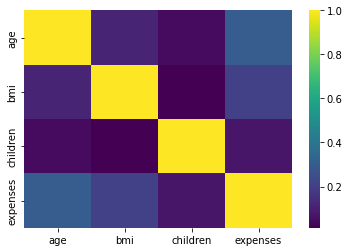

In [10]:
sns.heatmap(df.corr(), cmap='viridis')

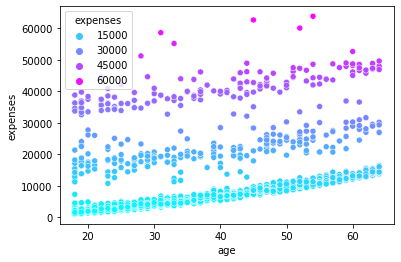

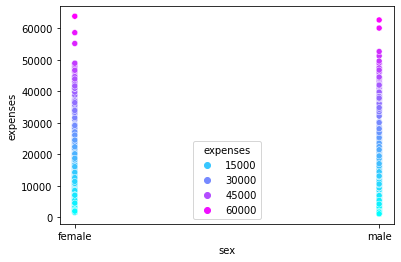

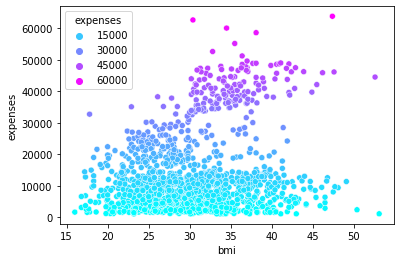

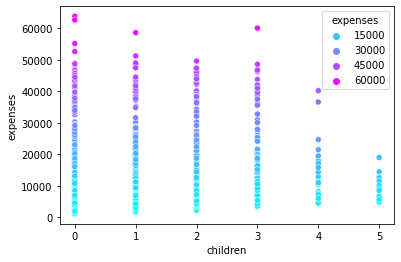

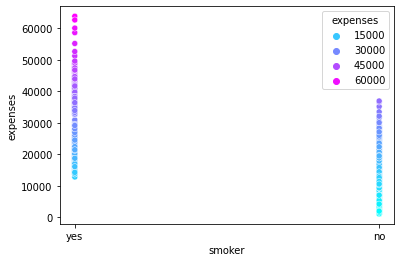

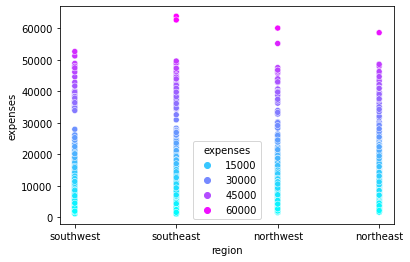

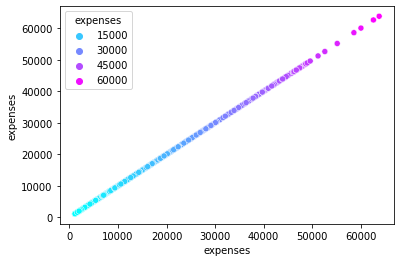

In [11]:
for i in df.columns:
    sns.scatterplot(data=df, x=i, y='expenses',hue='expenses',palette='cool')
    plt.show()

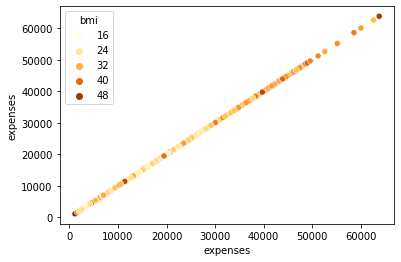

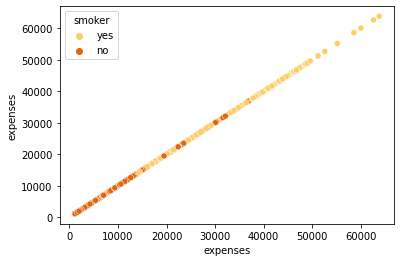

In [12]:
for i in ['bmi','smoker']:
    sns.scatterplot(data=df, x='expenses', y='expenses',hue=i,palette='YlOrBr')
    plt.show()

<AxesSubplot:xlabel='expenses', ylabel='Count'>

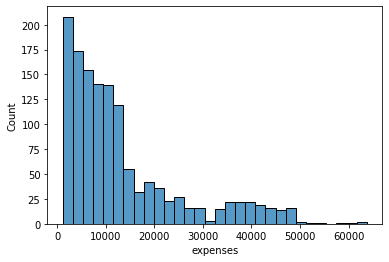

In [13]:
sns.histplot(df['expenses'])


In [15]:
data=ProfileReport(df)

In [16]:
data

ModuleNotFoundError: No module named 'ipywidgets'